In [3]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit
from scipy.signal   import savgol_filter

In [4]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 12

In [7]:
filename = '/Users/romoluque_c/LEGEND/BACON/datatest/run-11_20_2023-file_1.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

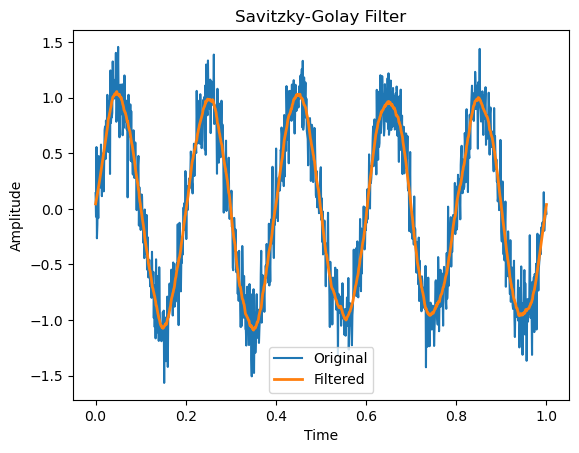

In [1]:
# Assuming you have a waveform, replace this with your actual data
time = np.linspace(0, 1, 1000)
waveform = np.sin(2 * np.pi * 5 * time) + 0.2 * np.random.normal(size=len(time))

# Apply the Savitzky-Golay filter
window_size = 51  # Adjust the window size according to your data
order = 3  # Adjust the order according to your data
filtered_waveform = savgol_filter(waveform, window_size, order)

# Plot the original and filtered waveforms
plt.plot(time, waveform, label='Original')
plt.plot(time, filtered_waveform, label='Filtered', linewidth=2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Savitzky-Golay Filter')
plt.show()


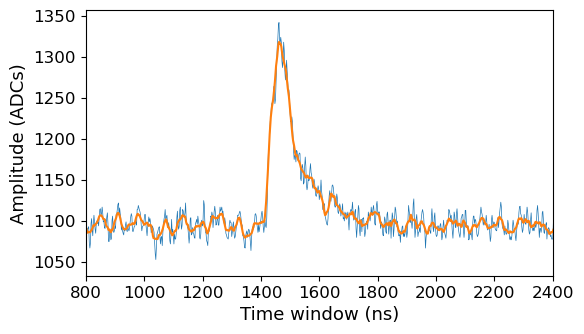

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
f_wf = savgol_filter(wf, 10, 0)
ax.plot(2*np.arange(len(wf)),   wf,   linewidth=0.5)
ax.plot(2*np.arange(len(f_wf)), f_wf, linewidth=1.5)
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(800, 2400)
plt.tight_layout()
plt.show()

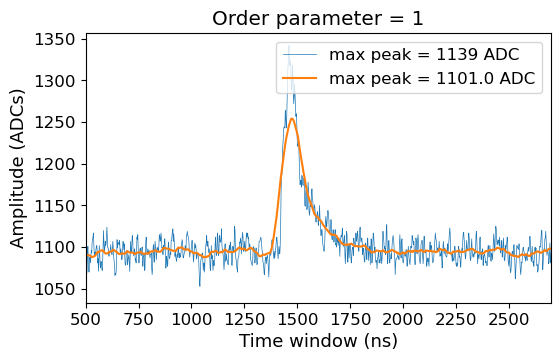

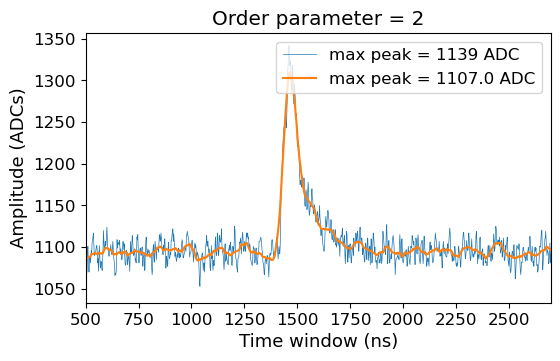

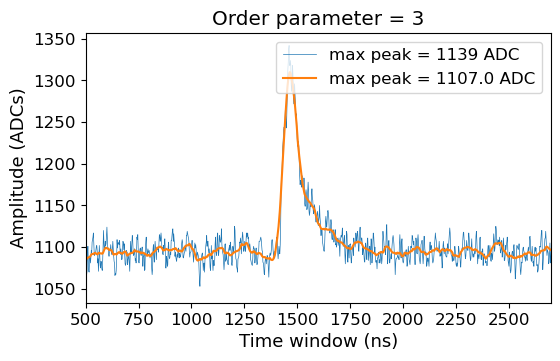

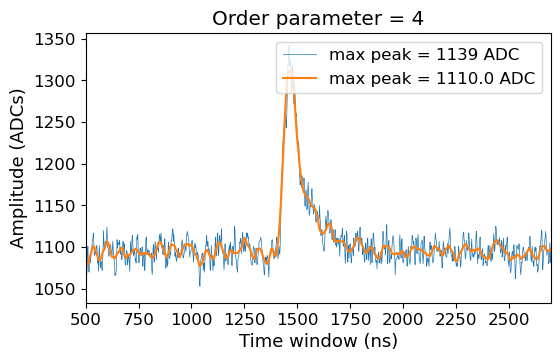

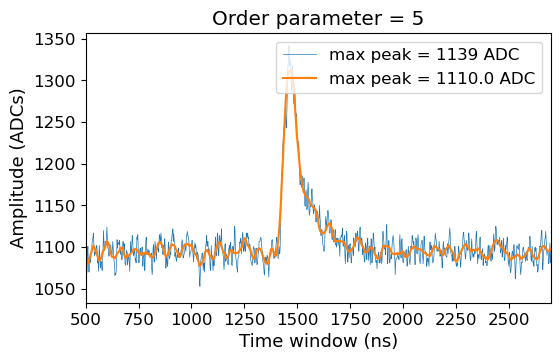

In [81]:
for i in [1, 2, 3, 4, 5]:
    fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
    wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
    ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'max peak = {np.round(np.max(wf[1000:5400]))} ADC')

    f_wf = savgol_filter(wf, 50, i)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'max peak = {np.round(np.max(f_wf[1000:5400]))} ADC')
    ax.set_xlabel('Time window (ns)', fontsize=13)
    ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
    ax.set_xlim(500, 2700)
    ax.set_title(f'Order parameter = {i}')
    ax.legend()
    plt.show()

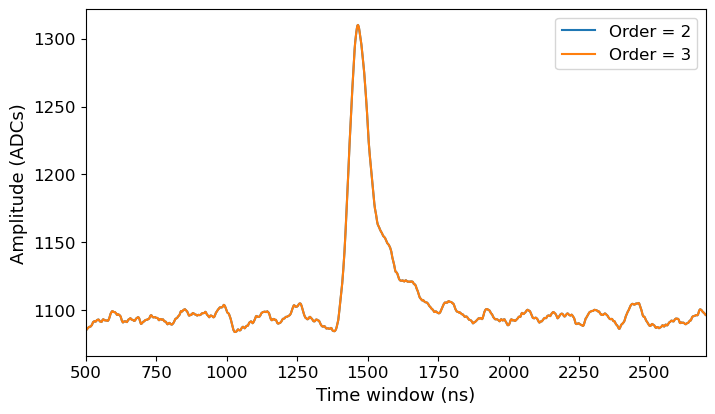

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
for i in [2, 3]:
    f_wf = savgol_filter(wf, 50, i)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'Order = {i}')
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(500, 2700)
ax.legend()
plt.show()

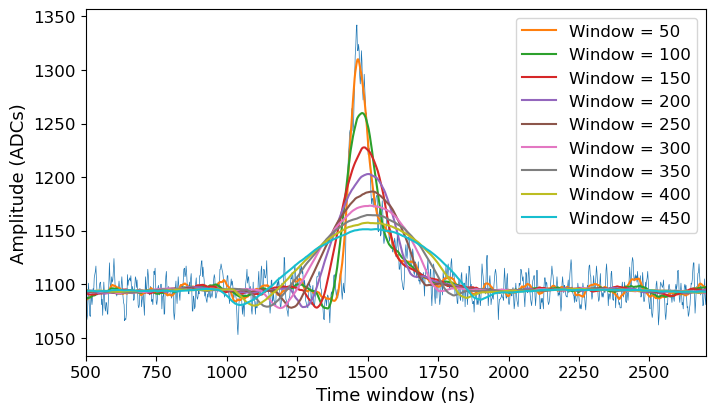

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
for j in np.arange(50, 500, 50):
    f_wf = savgol_filter(wf, j, 3)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'Window = {j}')
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(500, 2700)
ax.legend()
plt.show()

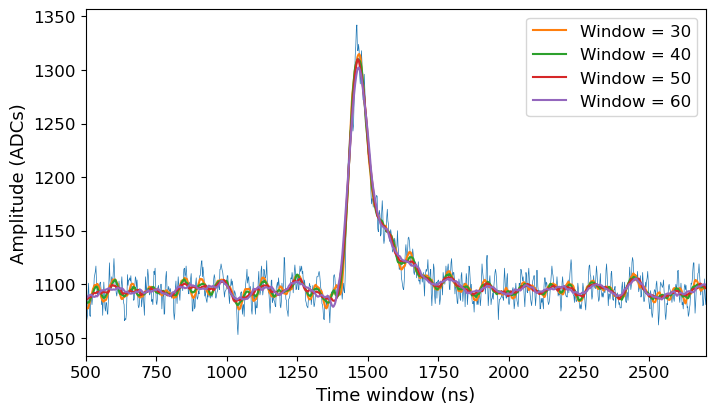

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
for j in np.arange(30, 70, 10):
    f_wf = savgol_filter(wf, j, 3)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'Window = {j}')
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(500, 2700)
ax.legend()
plt.show()

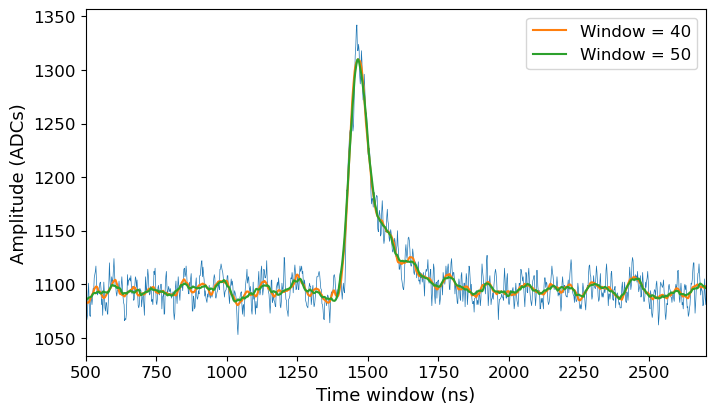

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
for j in np.arange(40, 60, 10):
    f_wf = savgol_filter(wf, j, 3)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'Window = {j}')
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(500, 2700)
ax.legend()
plt.show()

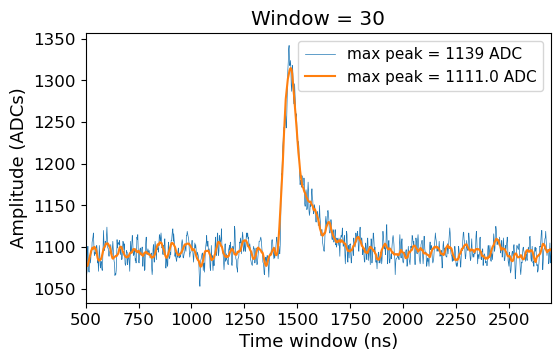

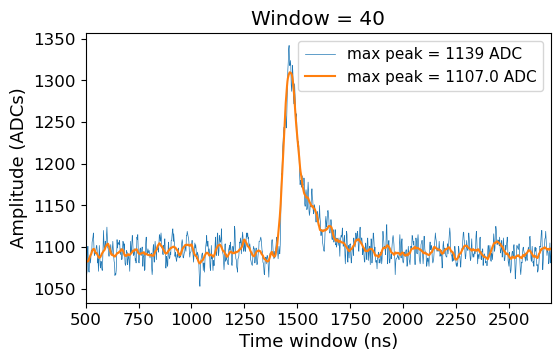

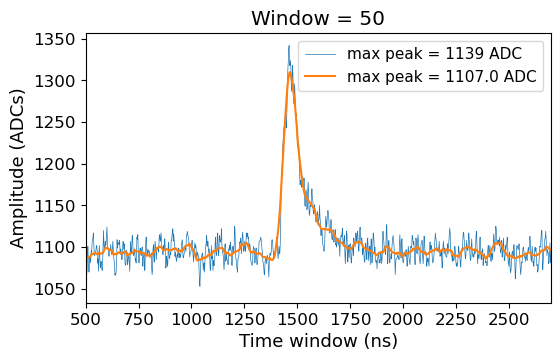

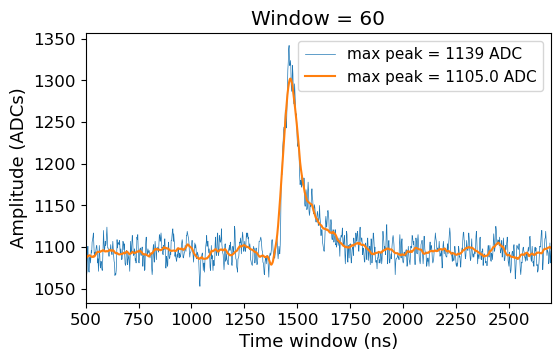

In [78]:
for j in np.arange(30, 70, 10):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
    wf = np.array(RawTree[f'chan0/rdigi'].array())[4]
    ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'max peak = {np.round(np.max(wf[1000:5400]))} ADC')

    f_wf = savgol_filter(wf, j, 3)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'max peak = {np.round(np.max(f_wf[1000:5400]))} ADC')
    ax.set_xlabel('Time window (ns)', fontsize=13)
    ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
    ax.set_xlim(500, 2700)
    ax.set_title(f'Window = {j}')
    plt.legend(fontsize=11)
    plt.show()

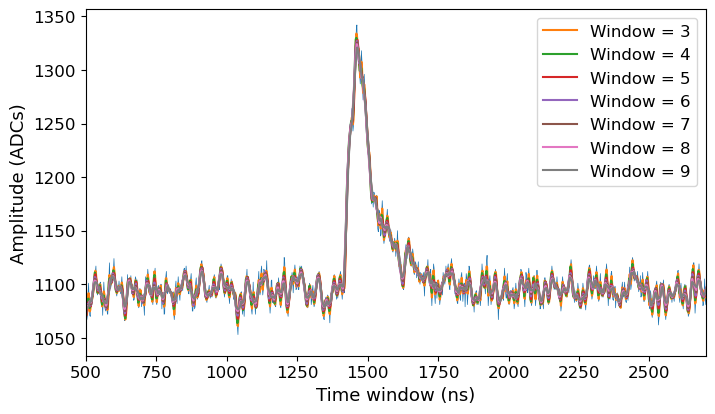

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
wf   = np.array(RawTree[f'chan0/rdigi'].array())[4]
ax.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
for j in np.arange(3, 10, 1):
    f_wf = savgol_filter(wf, j, 0)
    ax.plot(2*np.arange(len(f_wf)), f_wf, label=f'Window = {j}')
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(500, 2700)
ax.legend()
plt.show()

## Try with the subtracted wf

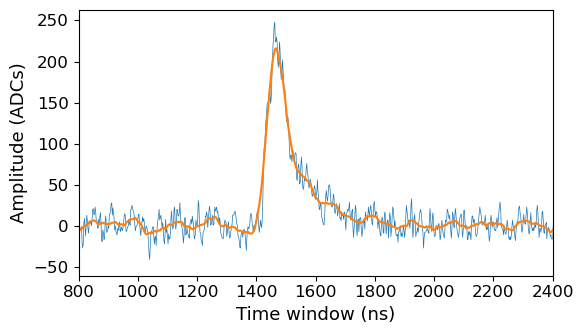

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
wf    = np.array(RawTree[f'chan0/rdigi'].array())[4]
s_wf  = pf.subtract_baseline(wf, mode=True, wf_range_bsl=(0, 500))
fs_wf = savgol_filter(s_wf, 50, 3)
ax.plot(2*np.arange(len(s_wf)),  s_wf,  linewidth=0.5)
ax.plot(2*np.arange(len(fs_wf)), fs_wf, linewidth=1.5)
ax.set_xlabel('Time window (ns)', fontsize=13)
ax.set_ylabel('Amplitude (ADCs)', fontsize=13)
ax.set_xlim(800, 2400)
plt.tight_layout()
plt.show()

In [202]:
np.diff(fs_wf)

array([2.8161116, 2.5855541, 2.36308  , ..., 2.5534716, 2.9042892,
       3.2708628], dtype=float32)

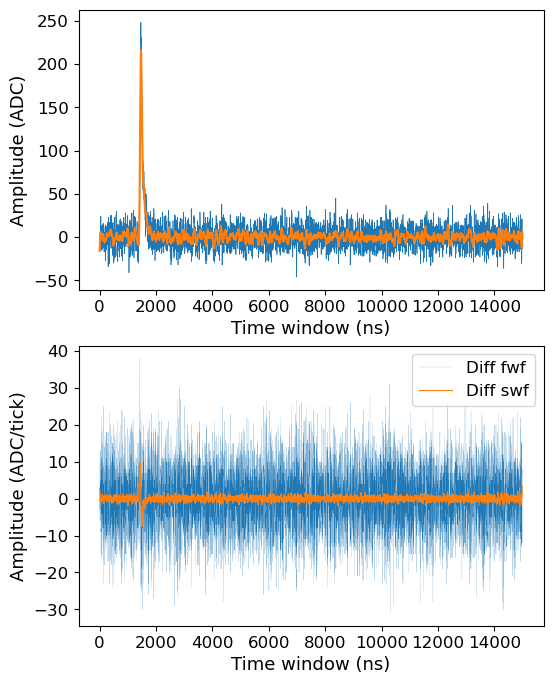

In [203]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8))
ax0.plot(2*np.arange(len(s_wf)),  s_wf,  linewidth=0.5)
ax0.plot(2*np.arange(len(fs_wf)), fs_wf, linewidth=1.5)
ax1.plot(2*np.arange(len(s_wf)) [:-1], np.diff(s_wf),  linewidth=0.1, label='Diff fwf')
ax1.plot(2*np.arange(len(fs_wf))[:-1], np.diff(fs_wf), linewidth=0.8, label='Diff swf')

ax0.set_xlabel('Time window (ns)', fontsize=13)
ax0.set_ylabel('Amplitude (ADC)',  fontsize=13)
#ax0.set_xlim(500, 4000)
ax1.set_xlabel('Time window (ns)',     fontsize=13)
ax1.set_ylabel('Amplitude (ADC/tick)', fontsize=13)
#ax1.set_xlim(500, 4000)
ax1.legend()
plt.show()

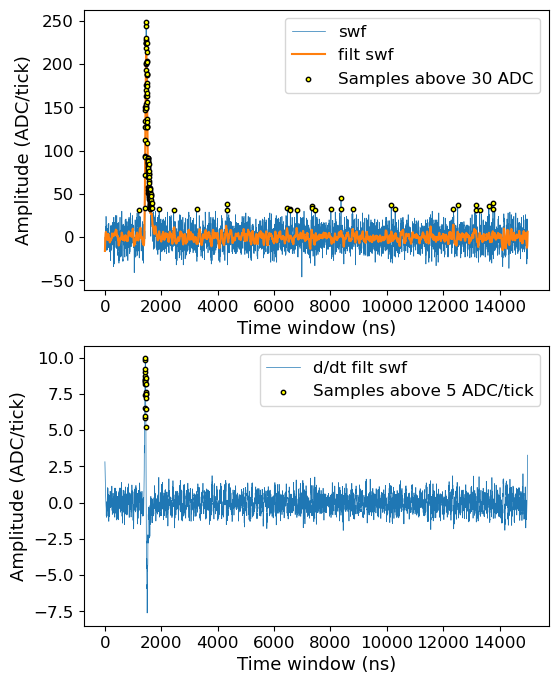

In [204]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8))

ax0.plot(2*np.arange(len(s_wf)),  s_wf,  linewidth=0.5, label='swf')
ax0.plot(2*np.arange(len(fs_wf)), fs_wf, linewidth=1.5, label='filt swf')

points_above_30_idx = np.where((s_wf>30))[0]
points_above_30_val = s_wf[points_above_30_idx]

ax0.scatter(2*points_above_30_idx, points_above_30_val, color='yellow', edgecolors='black', marker='o', s=10, zorder=2, label='Samples above 30 ADC')

ax0.set_xlabel('Time window (ns)',     fontsize=13)
ax0.set_ylabel('Amplitude (ADC/tick)', fontsize=13)
ax0.legend()


ax1.plot(2*np.arange(len(fs_wf))[:-1], np.diff(fs_wf), linewidth=0.5, label='d/dt filt swf')

points_above_5_idx = np.where((np.diff(fs_wf)>5))[0]
points_above_5_val = np.diff(fs_wf)[points_above_5_idx]

ax1.scatter(2*points_above_5_idx, points_above_5_val, color='yellow', edgecolors='black', marker='o', s=10, zorder=2, label='Samples above 5 ADC/tick')

ax1.set_xlabel('Time window (ns)',     fontsize=13)
ax1.set_ylabel('Amplitude (ADC/tick)', fontsize=13)
ax1.legend()
plt.show()

## Test several wfs

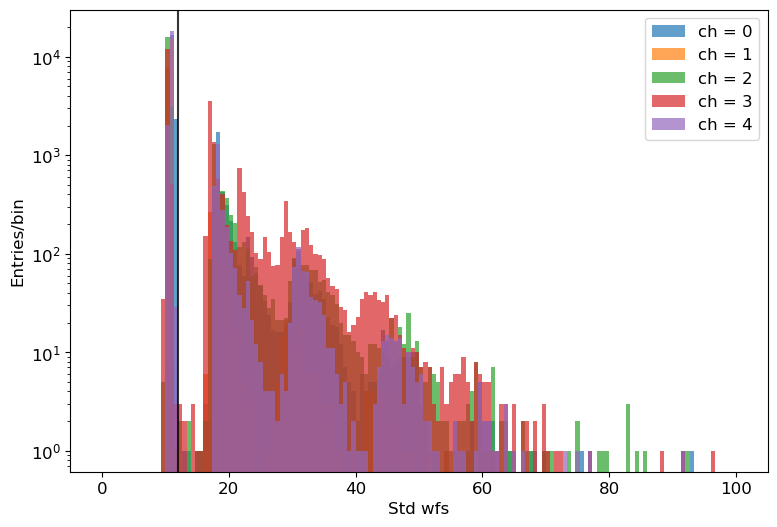

In [174]:
for ch in range(5):
    plt.hist(np.std(np.array(RawTree[f'chan{ch}/rdigi'].array()), axis=1), bins=150, range=(0, 100), log=True, alpha=0.7, label=f'ch = {ch}')
plt.axvline(x=12, color='k', alpha=0.8)
plt.xlabel('Std wfs')
plt.ylabel('Entries/bin')
plt.legend()
plt.show()

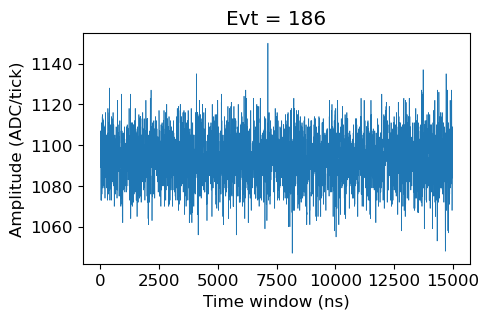

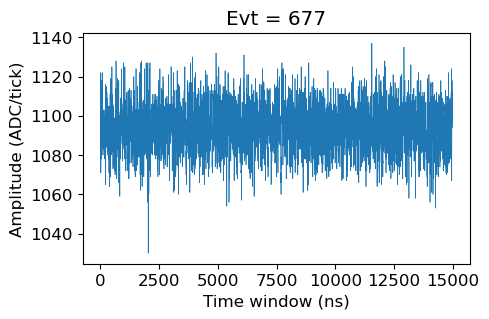

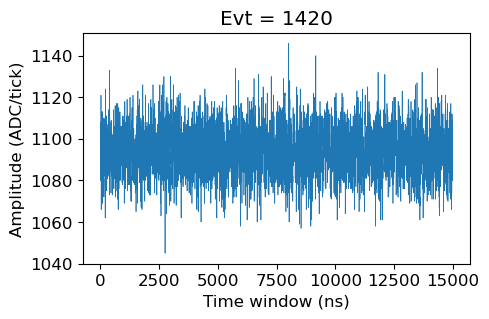

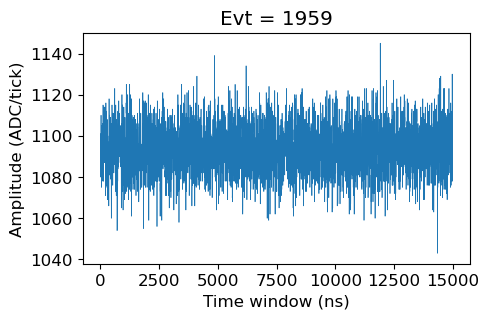

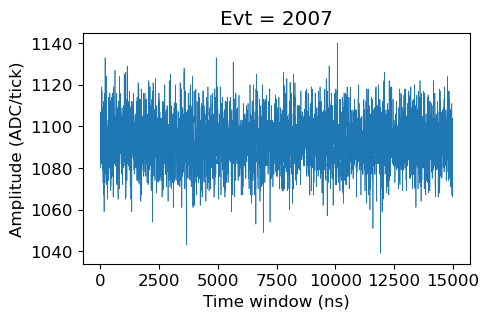

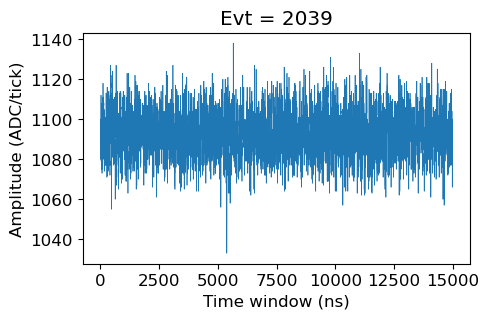

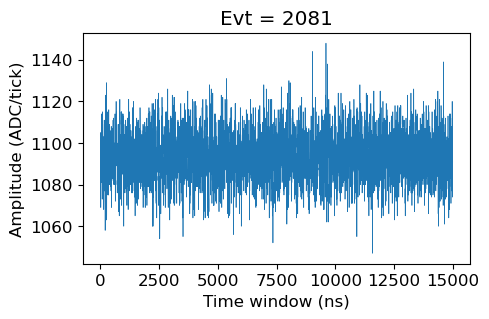

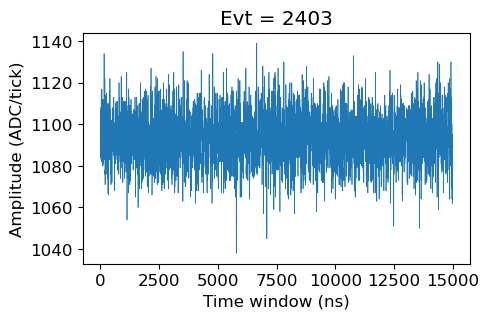

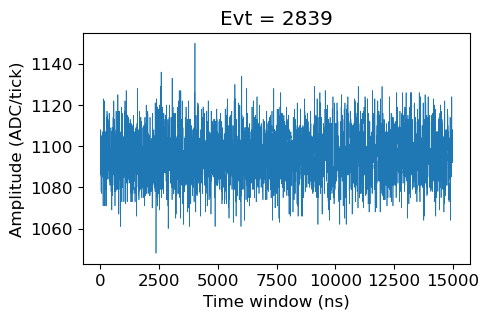

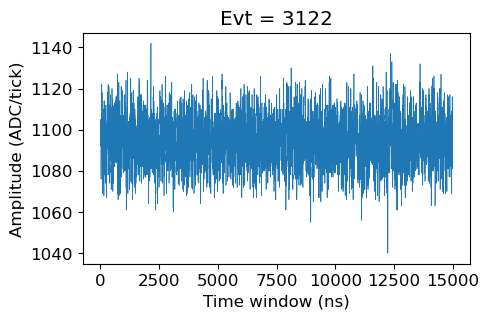

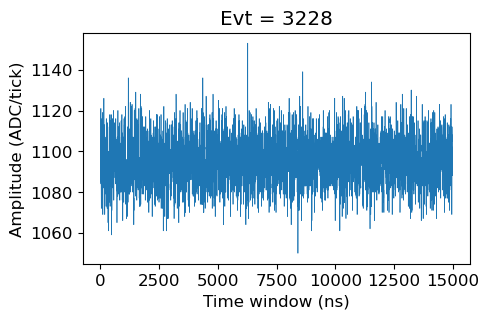

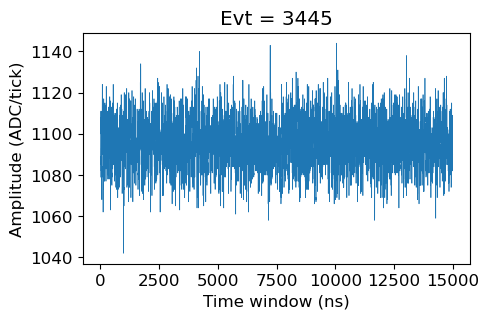

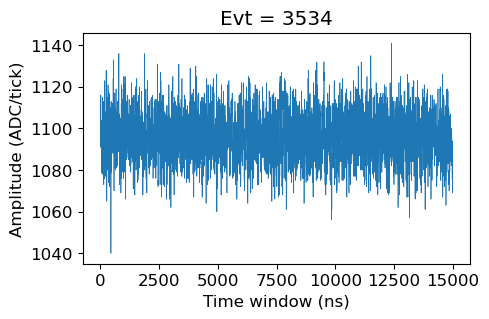

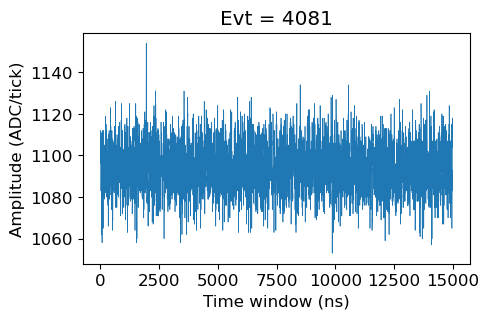

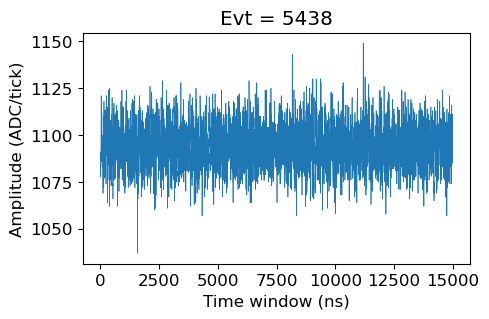

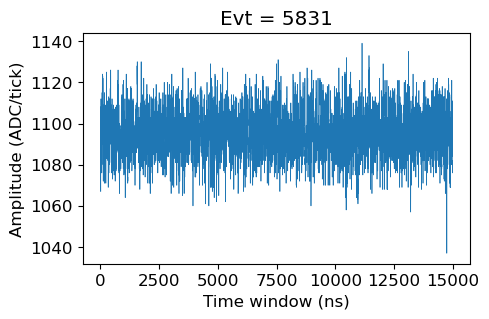

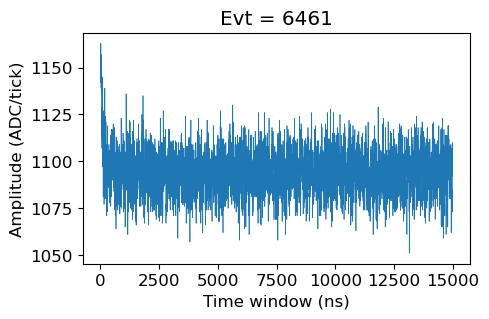

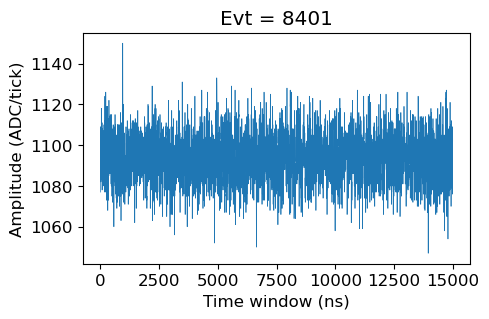

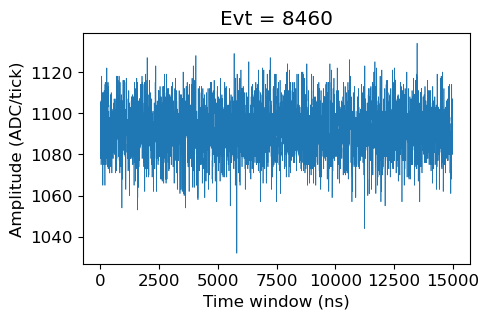

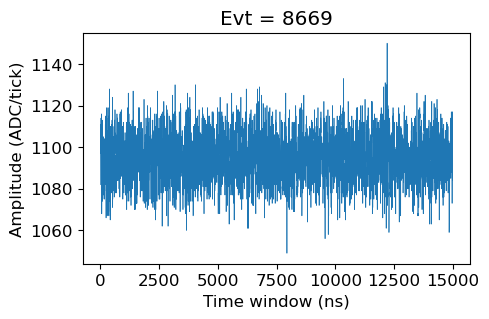

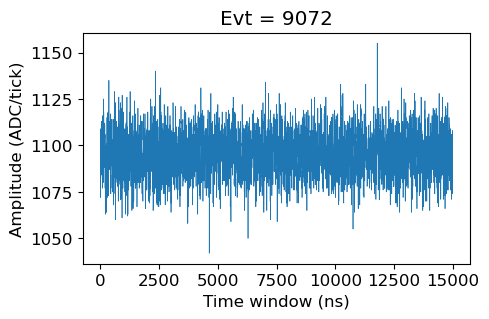

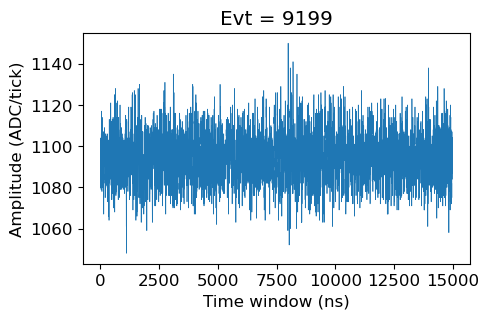

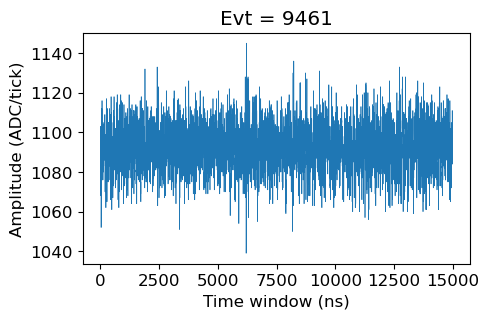

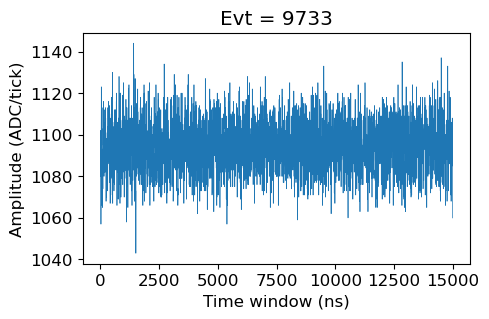

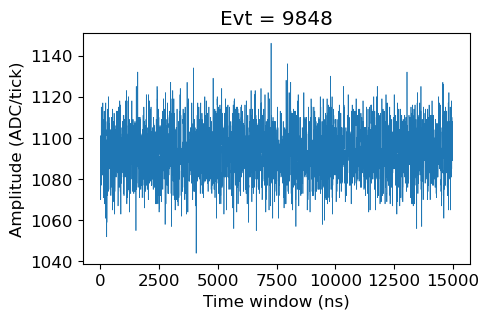

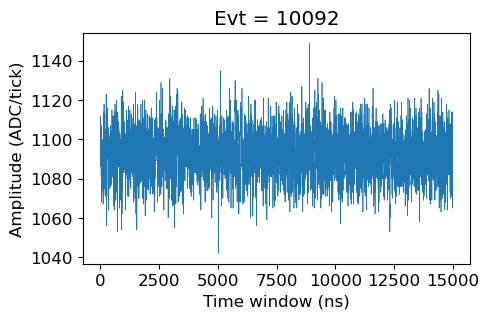

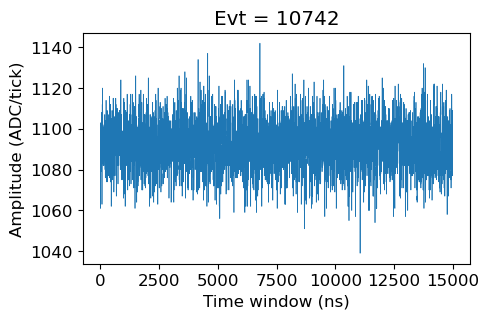

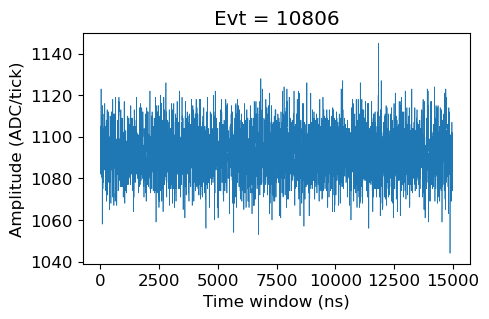

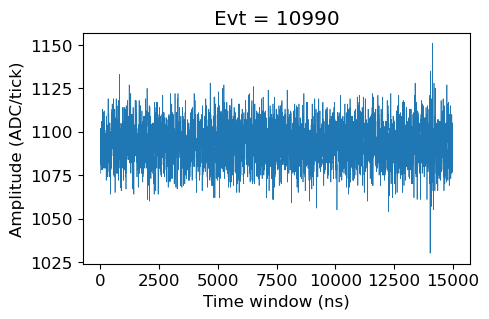

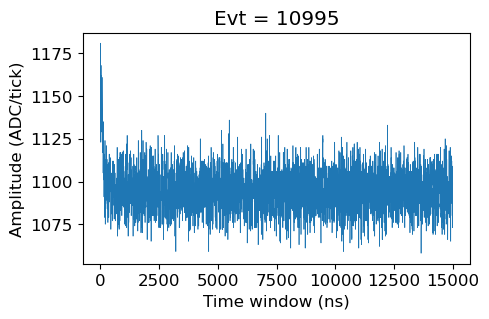

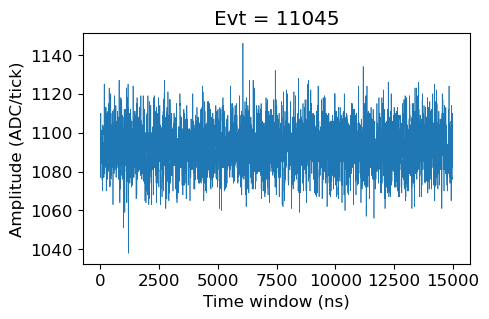

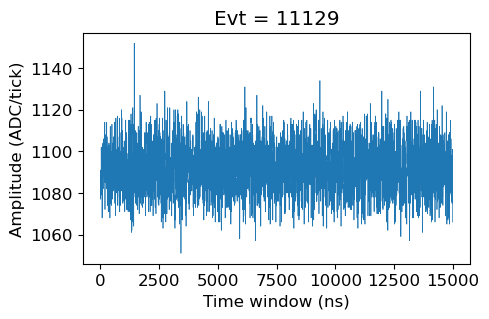

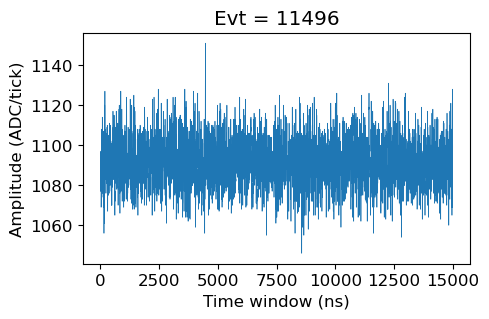

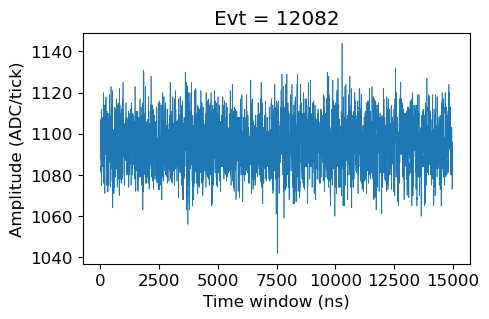

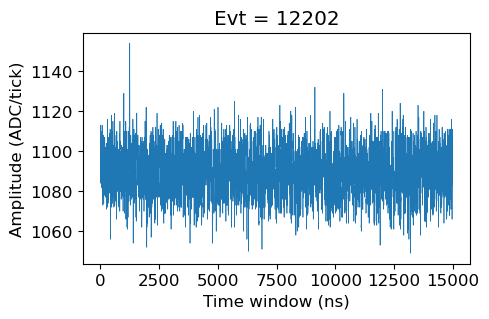

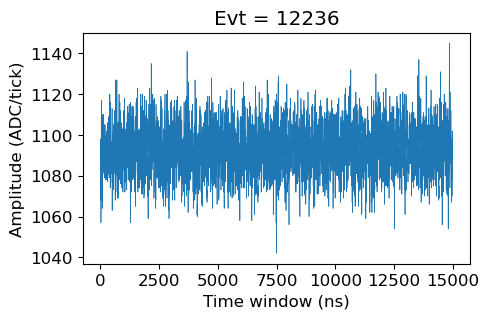

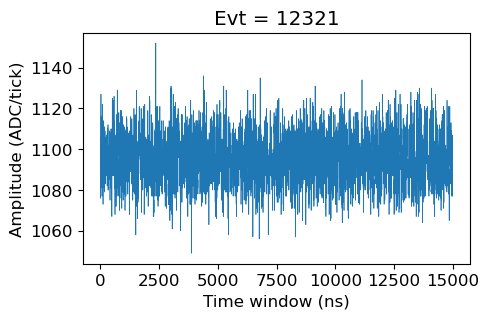

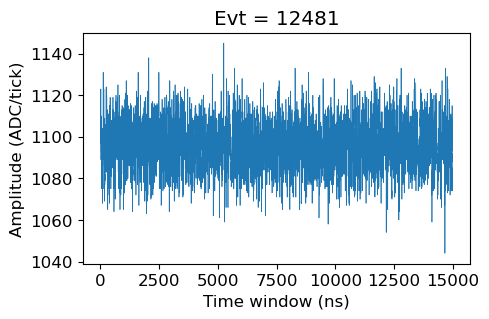

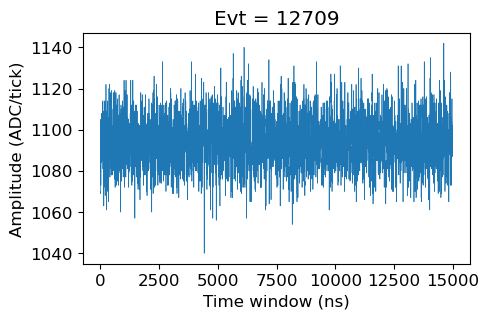

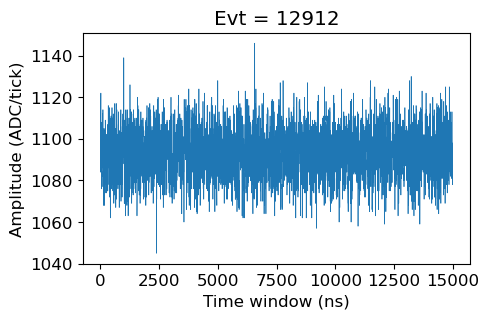

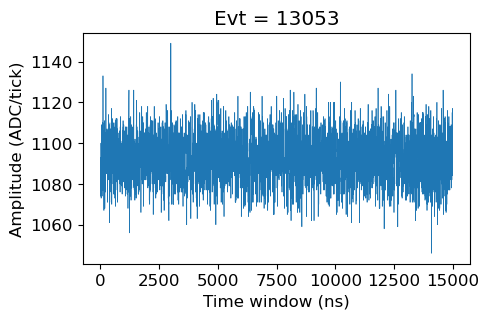

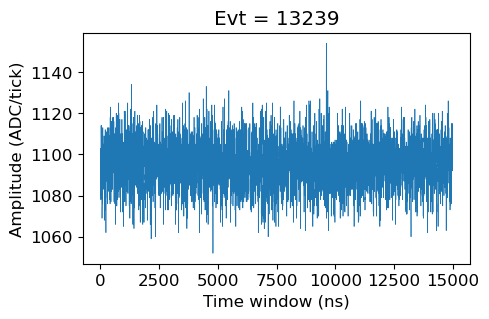

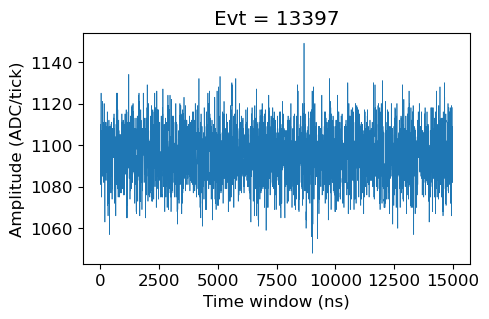

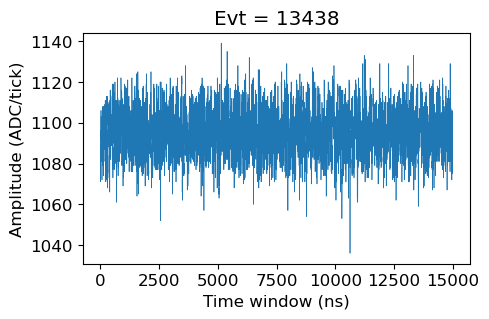

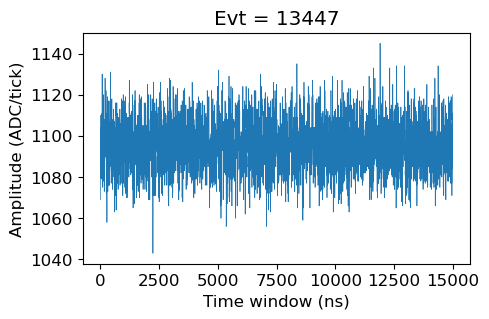

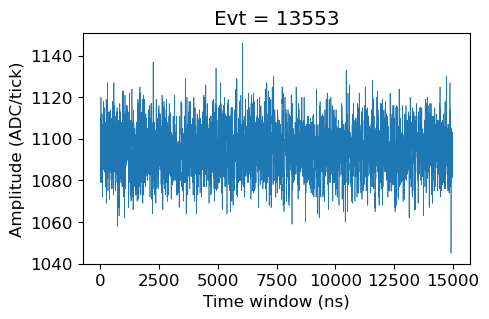

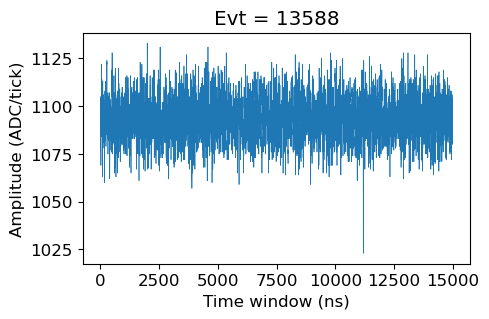

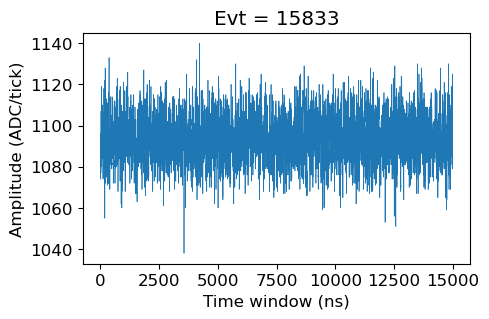

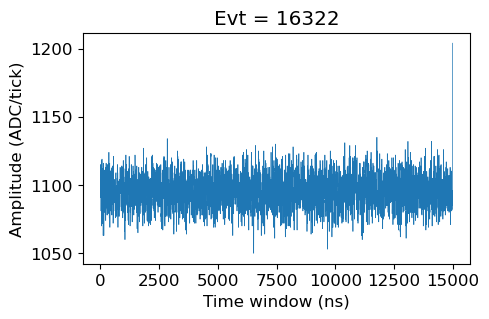

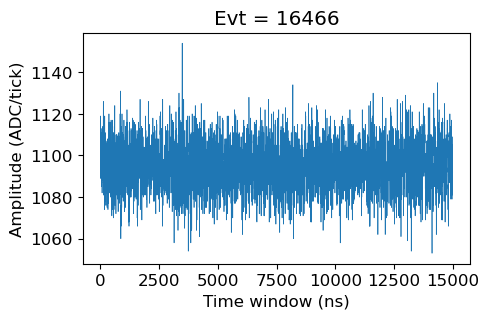

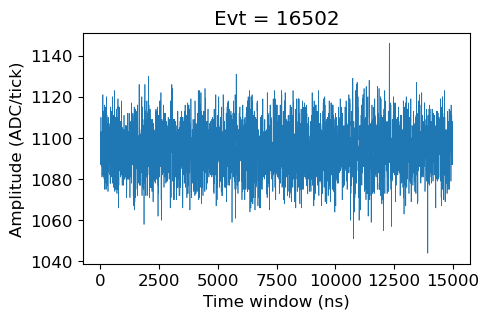

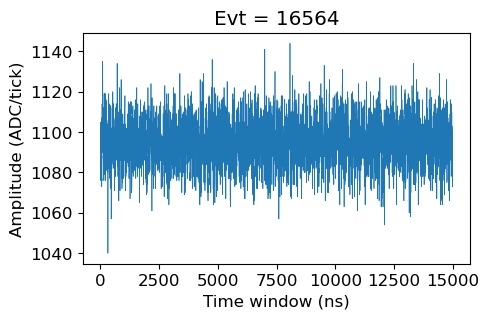

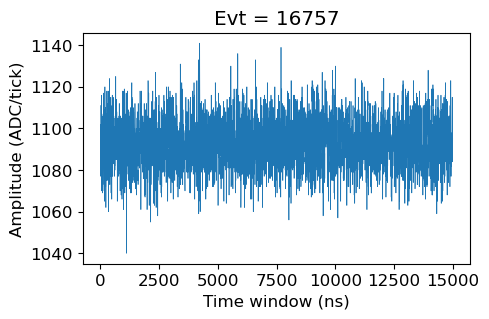

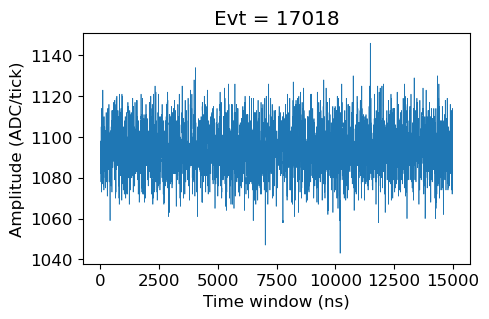

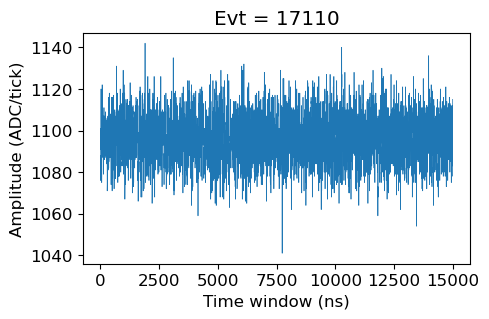

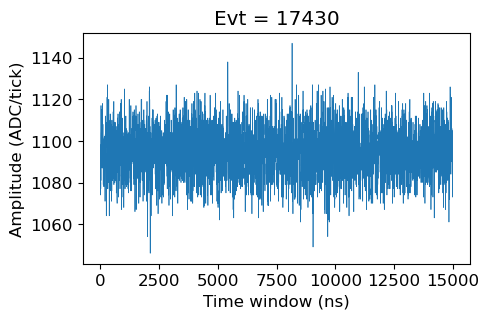

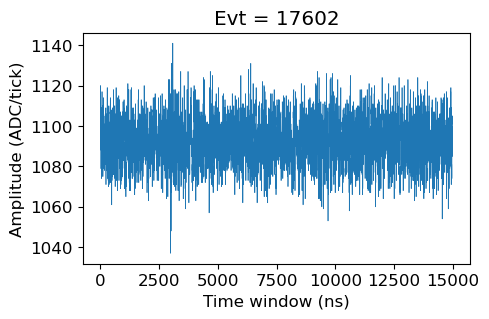

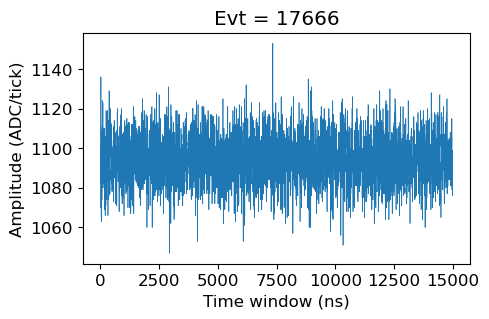

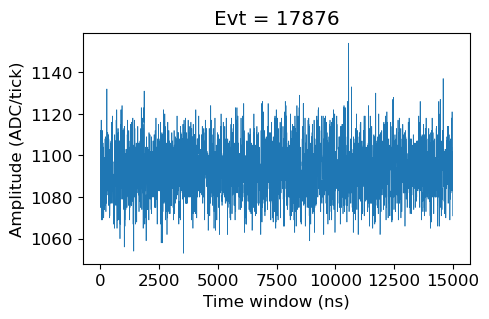

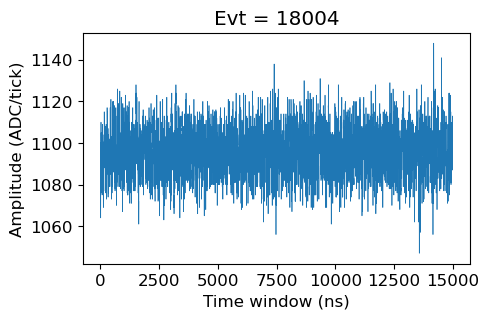

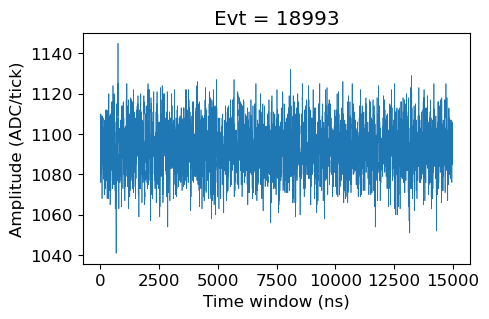

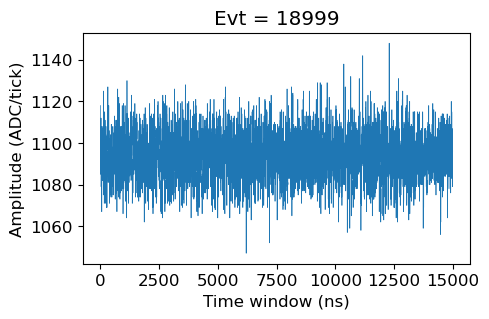

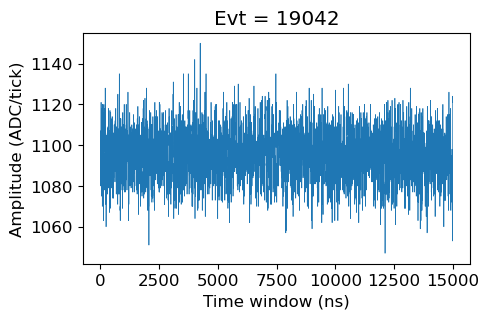

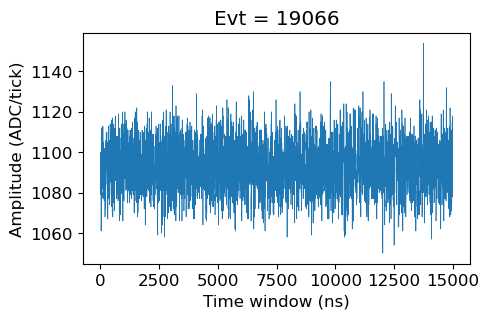

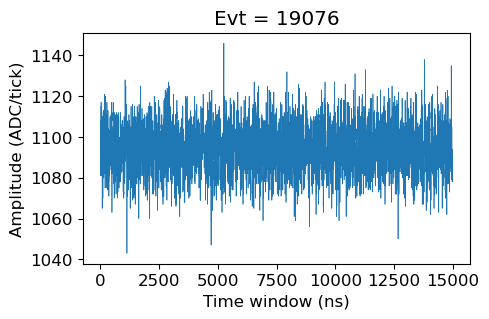

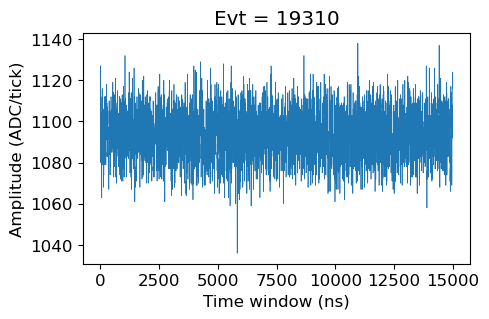

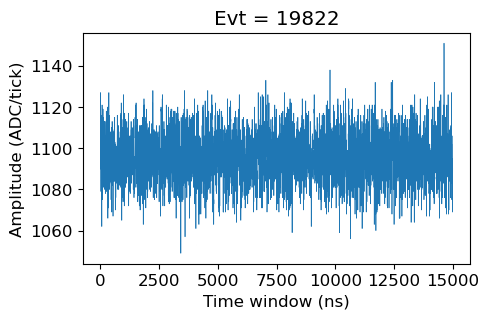

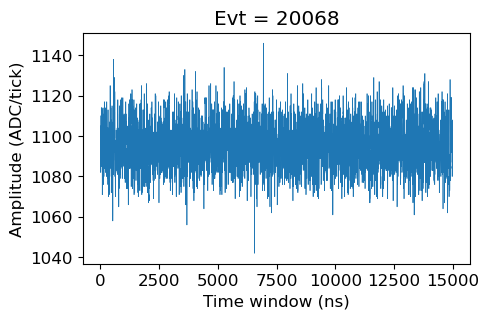

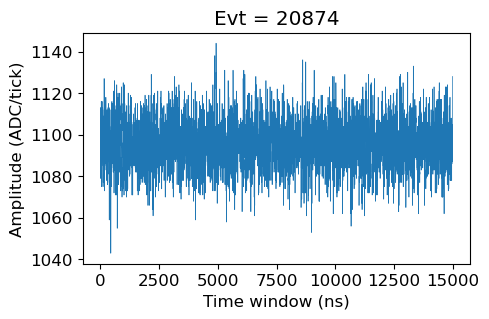

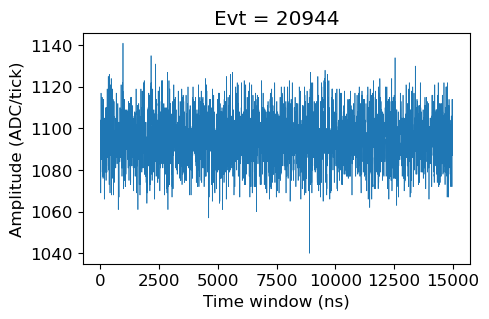

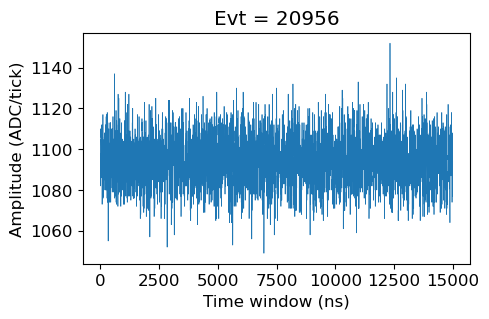

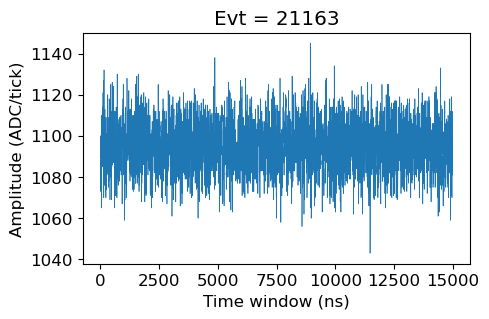

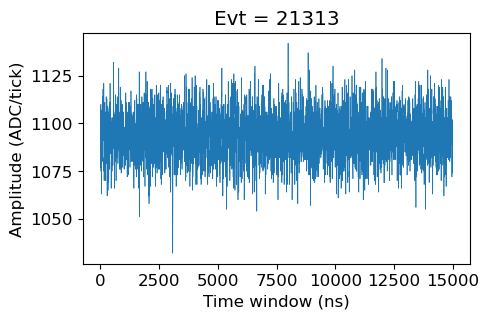

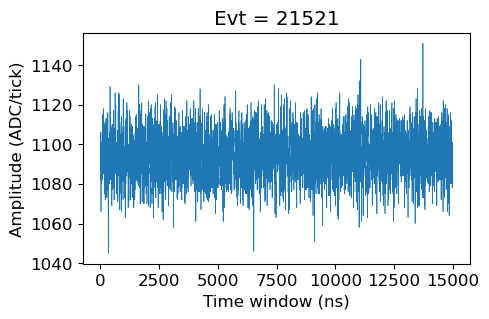

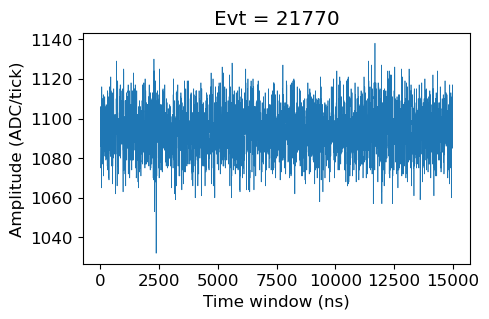

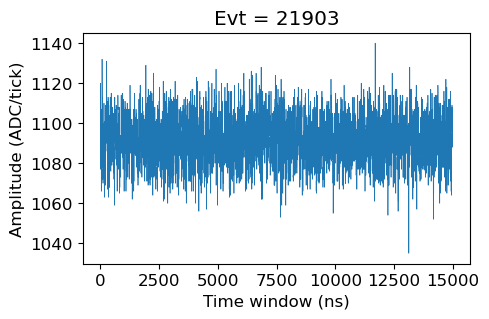

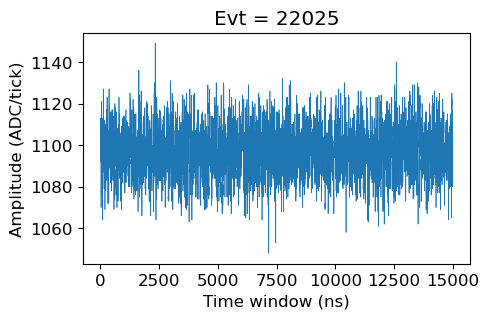

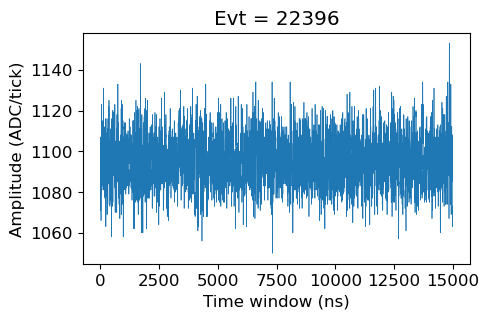

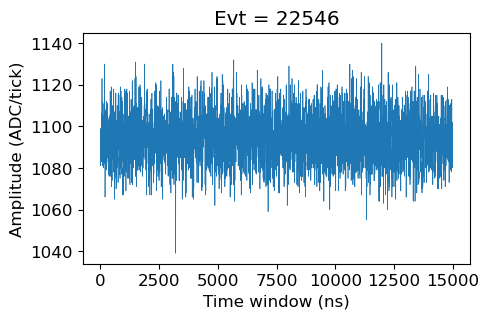

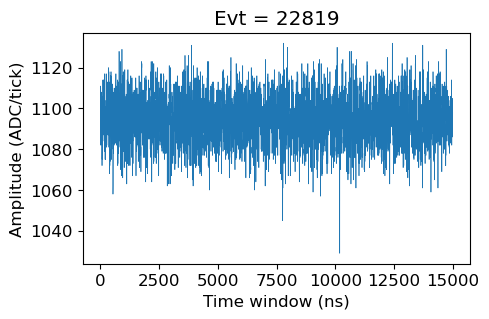

In [184]:
for evt, wf in enumerate(np.array(RawTree[f'chan0/rdigi'].array())):
    #print(np.std(wf))
    if np.std(wf) > 12:
        continue
        #plt.figure(figsize=(5, 3))
        #plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
        #plt.title(f'Evt = {evt}')
        #plt.xlabel('Time window (ns)',     fontsize=12)
        #plt.ylabel('Amplitude (ADC/tick)', fontsize=12)
        #plt.show()
    else:
        if np.max(wf) - np.min(wf) > 100:
            plt.figure(figsize=(5, 3))
            plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
            plt.title(f'Evt = {evt}')
            plt.xlabel('Time window (ns)',     fontsize=12)
            plt.ylabel('Amplitude (ADC/tick)', fontsize=12)
            plt.show()
        #print(np.max(wf) - np.min(wf))

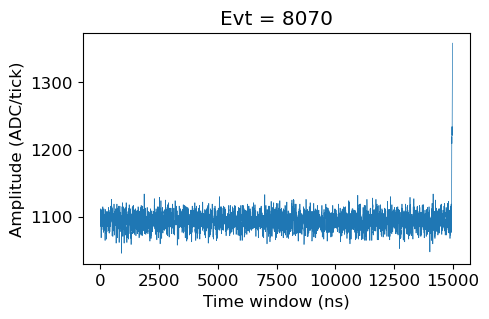

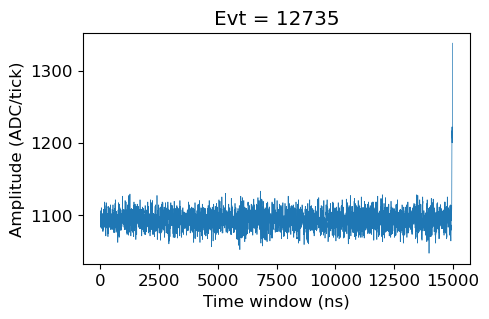

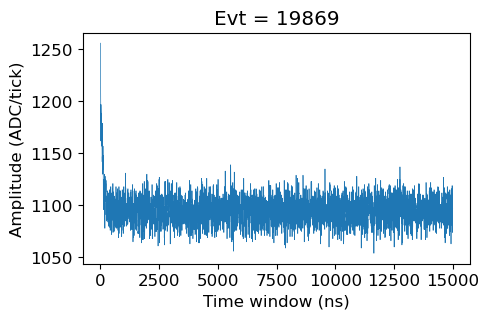

In [185]:
for evt, wf in enumerate(np.array(RawTree[f'chan0/rdigi'].array())):
    if np.std(wf) > 12 and np.std(wf) < 15:
        plt.figure(figsize=(5, 3))
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
        plt.title(f'Evt = {evt}')
        plt.xlabel('Time window (ns)',     fontsize=12)
        plt.ylabel('Amplitude (ADC/tick)', fontsize=12)
        plt.show()

In [187]:
all_wfs  = np.array(RawTree[f'chan0/rdigi'].array())
filt_wfs = np.array([wf for wf in all_wfs if np.std(wf) > 15])

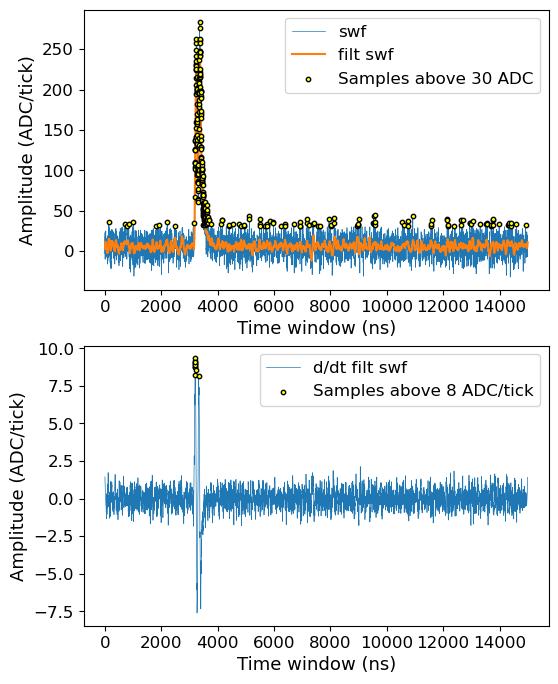

In [205]:
sel_evt = 80
wf      = np.array(RawTree[f'chan0/rdigi'].array())[sel_evt]
s_wf    = pf.subtract_baseline(wf, mode=True, wf_range_bsl=(0, 500))
fs_wf   = savgol_filter(s_wf, 50, 3)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8))

ax0.plot(2*np.arange(len(s_wf)),  s_wf,  linewidth=0.5, label='swf')
ax0.plot(2*np.arange(len(fs_wf)), fs_wf, linewidth=1.5, label='filt swf')

points_above_30_idx = np.where((s_wf>30))[0]
points_above_30_val = s_wf[points_above_30_idx]

ax0.scatter(2*points_above_30_idx, points_above_30_val, color='yellow', edgecolors='black', marker='o', s=10, zorder=2, label='Samples above 30 ADC')

ax0.set_xlabel('Time window (ns)',     fontsize=13)
ax0.set_ylabel('Amplitude (ADC/tick)', fontsize=13)
ax0.legend()


thr2 = 8
ax1.plot(2*np.arange(len(fs_wf))[:-1], np.diff(fs_wf), linewidth=0.5, label='d/dt filt swf')

points_above_thr_idx = np.where((np.diff(fs_wf)>thr2))[0]
points_above_thr_val = np.diff(fs_wf)[points_above_thr_idx]

ax1.scatter(2*points_above_thr_idx, points_above_thr_val, color='yellow', edgecolors='black', marker='o', s=10, zorder=2, label=f'Samples above {thr2} ADC/tick')

ax1.set_xlabel('Time window (ns)',     fontsize=13)
ax1.set_ylabel('Amplitude (ADC/tick)', fontsize=13)
ax1.legend()
plt.show()

## Try different photoelectron thrs using the channel gain

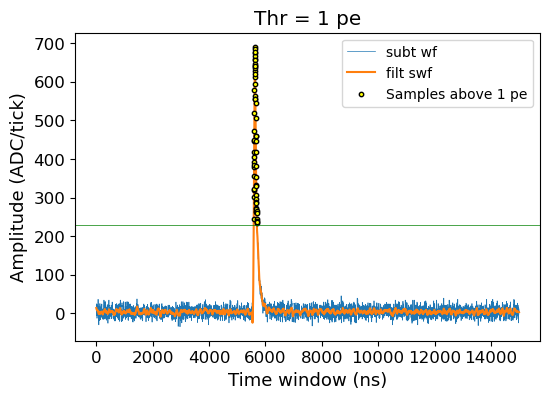

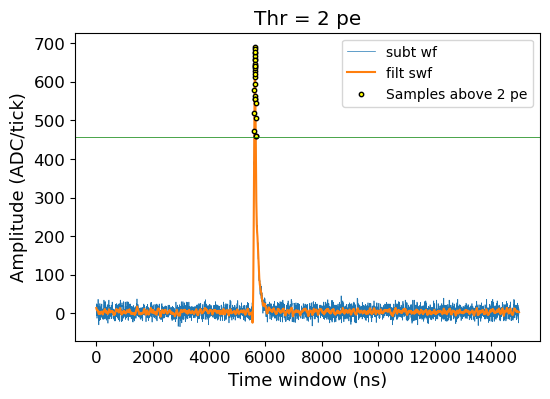

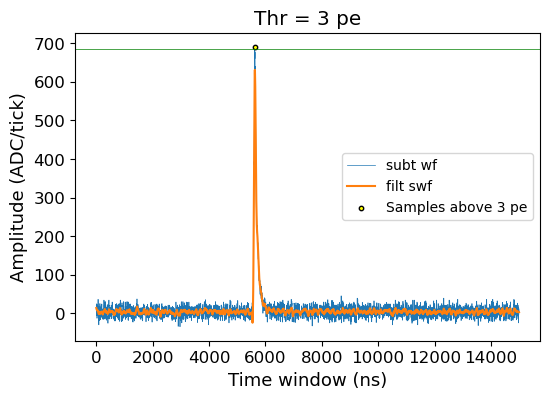

In [206]:
gain_ch0_11_20_2023 = 228.6 #Computed in Calibration_all_channels.ipynb
sel_evt             = 21

for thr_pe in [1, 2, 3]:

    wf      = np.array(RawTree[f'chan0/rdigi'].array())[sel_evt]
    s_wf    = pf.subtract_baseline(wf, mode=True, wf_range_bsl=(0, 500))
    fs_wf   = savgol_filter(s_wf, 50, 3)
    
    plt.figure(figsize=(6, 4))
    
    plt.plot(2*np.arange(len(s_wf)),  s_wf,  linewidth=0.5, label='subt wf')
    plt.plot(2*np.arange(len(fs_wf)), fs_wf, linewidth=1.5, label='filt swf')
    
    thr1 = thr_pe*gain_ch0_11_20_2023
    points_above_thr_idx = np.where((s_wf>thr1))[0]
    points_above_thr_val = s_wf[points_above_thr_idx]
    
    plt.scatter(2*points_above_thr_idx, points_above_thr_val, color='yellow', edgecolors='black', marker='o', s=10, zorder=2, label=f'Samples above {thr_pe} pe')
    plt.axhline(y=thr1, color='green', linewidth=0.5)
    
    plt.title(f'Thr = {thr_pe} pe')
    plt.xlabel('Time window (ns)',     fontsize=13)
    plt.ylabel('Amplitude (ADC/tick)', fontsize=13)
    plt.legend(fontsize=10)
    plt.show()

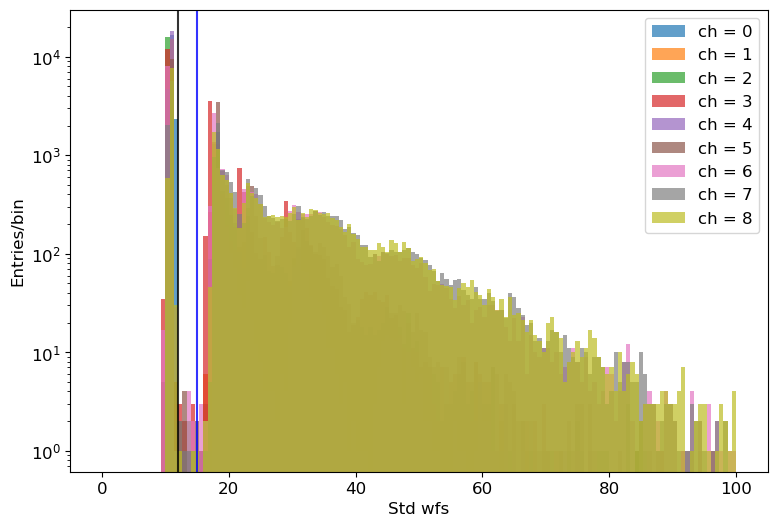

In [190]:
for ch in range(9):
    plt.hist(np.std(np.array(RawTree[f'chan{ch}/rdigi'].array()), axis=1), bins=150, range=(0, 100), log=True, alpha=0.7, label=f'ch = {ch}')
plt.axvline(x=12, color='k', alpha=0.8)
plt.axvline(x=15, color='b', alpha=0.8)
plt.xlabel('Std wfs')
plt.ylabel('Entries/bin')
plt.legend()
plt.show()

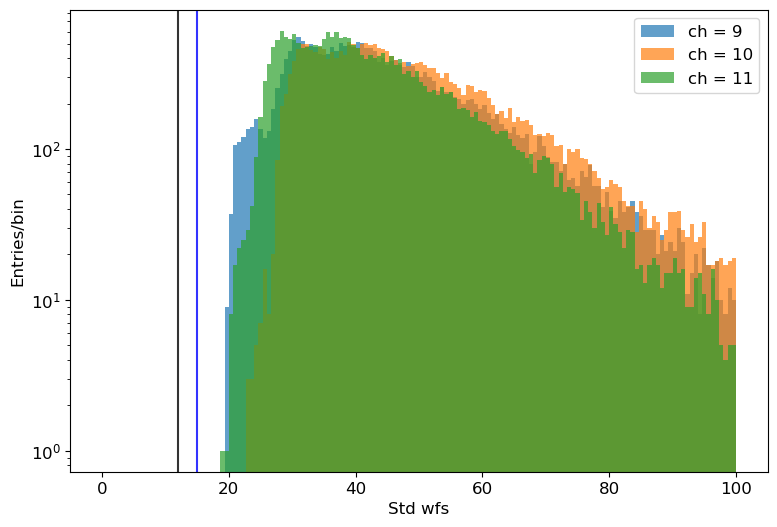

In [191]:
for ch in [9, 10, 11]:
    plt.hist(np.std(np.array(RawTree[f'chan{ch}/rdigi'].array()), axis=1), bins=150, range=(0, 100), log=True, alpha=0.7, label=f'ch = {ch}')
plt.axvline(x=12, color='k', alpha=0.8)
plt.axvline(x=15, color='b', alpha=0.8)
plt.xlabel('Std wfs')
plt.ylabel('Entries/bin')
plt.legend()
plt.show()

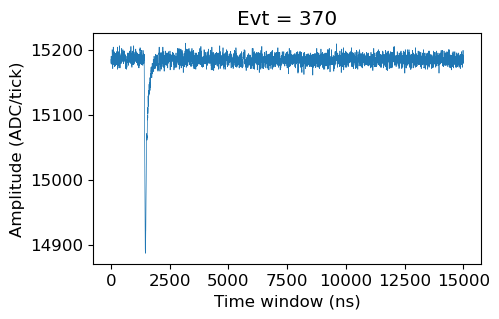

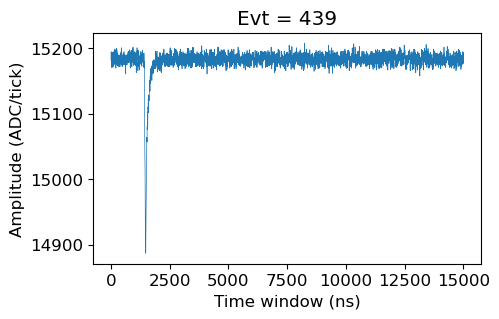

In [198]:
for evt, wf in enumerate(np.array(RawTree[f'chan9/rdigi'].array())[:1000]):
    if np.std(wf) < 20:
        plt.figure(figsize=(5, 3))
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
        plt.title(f'Evt = {evt}')
        plt.xlabel('Time window (ns)',     fontsize=12)
        plt.ylabel('Amplitude (ADC/tick)', fontsize=12)
        plt.show()